In [1]:
import numpy as np
import scipy.signal as sig
import scipy.fft as fft
import matplotlib.pyplot as plt

In [2]:
def plt_fft(u):
    ufft = fft.fftshift(fft.fft(u))
    ufft_abs =  ufft.real**2 + ufft.imag**2
    plt.plot(fft.fftshift(fft.fftfreq(len(u))), ufft_abs)

We create a sine signal with a defined frequency $\theta$ and plot the signal and its spectrum.

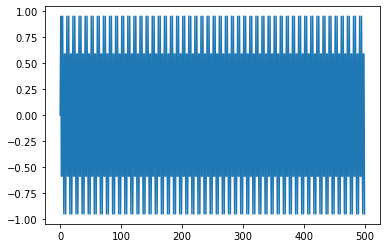

In [64]:
N = 500
theta = 0.3
#theta = 0.1
t = np.arange(N)
u = np.sin(2 * np.pi * theta * t)
# u = sig.lfilter(taps, [1], u)
plt.plot(t,u)

We have chosen our signal definition, spectrum calculation so that the $\theta$ value above matches the spectrum plot; i.e. there is a peak in the spectrum at $\pm \theta$.

The spectrum is periodic with period $1$ - so there are additional ines at $1 \pm \theta, -1 \pm \theta$ etc...

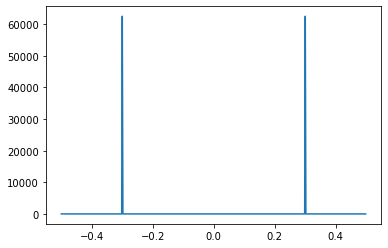

In [65]:
plt_fft(u)

Now we downsample the signal. The spectrum between $[-0.5, 0.5]$ gets spread by a factor $2$ yielding two peaks at $\pm 2 \theta$.

The same happens for the other spectrum copies: So the copy centered at $1$ is spread to $1 \pm 2 \theta$, the one centered at $-1$ is spread to $-1 \pm 2 \theta$ and so on.

We consider two cases:
- 1) with $\theta=0.1$: The spectrum of the oringal signal has peaks at $\pm 0.1$, the spectrum of the downsampled signal has peaks at $\pm 0.2$. The periodic copies have peaks at $-1 \pm 0.2 = -1.2, -0.8$ and $1 \pm 0.2 = 0.8, 1.2$
- 2) with $\theta=0.3$: The spectrum of the oringal signal has peaks at $\pm 0.3$, the spectrum of the downsampled signal has peaks at $\pm 0.6$. These are "outside" the $F_s/2$ range; however, the periodic copies have peaks at $-1 \pm 0.6 = -1.6, -0.4$ and $1 \pm 0.6 = 0.4, 1.6$. So out spectrum (inside the $[-0.5, 0.5]$ range has peaks at $\pm 0.4$ and this **is aliasing**. The downsampled signal is a different one than the original one.


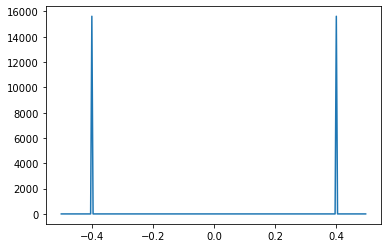

In [66]:
v = np.copy(u[::2]) # CAREFUL, we need to take a copy here; otherwise this is just a reference!
plt_fft(v)

<StemContainer object of 3 artists>

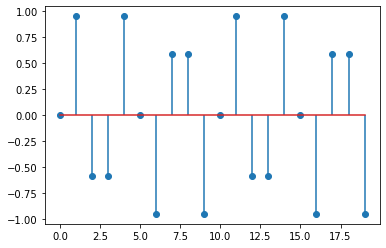

In [67]:
plt.stem(u[0:20])

<StemContainer object of 3 artists>

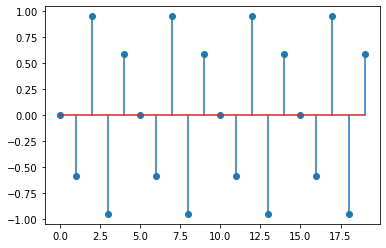

In [68]:
plt.stem(v[0:20])